<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
RANDOM_STATE = RandomState(123)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor


In [2]:
try:
    data_full = pd.read_csv("/Users/sidil/Downloads/Telegram Desktop/Project_2/gold_recovery_full_new.csv")
    data_test = pd.read_csv("/Users/sidil/Downloads/Telegram Desktop/Project_2/gold_recovery_test_new.csv")
    data_train = pd.read_csv("/Users/sidil/Downloads/Telegram Desktop/Project_2/gold_recovery_train_new.csv")
except:
    data_full = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    data_train = pd.read_csv("/datasets/gold_recovery_full_new.csv")

In [3]:
data_full = data_full.drop(['date'], axis = 1)

display(data_full.head(2))

data_full.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


In [4]:
data_test = data_test.drop(['date'], axis = 1)
display(data_test.head(2))
data_test.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [5]:
data_train = data_train.drop(['date'], axis = 1)
display(data_train.head(2))
data_train.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                                19439 non-null  float64


In [6]:
# проверяем наличие дубликатов
print('Количество полных дубликатов в исходном файле:', data_full.duplicated().sum())

Количество полных дубликатов в исходном файле: 0


In [7]:
# проверяем пропущенные значения в иcходном файле
data_full_null = data_full.isna().sum().sort_values(ascending=False).to_frame(name='null_qnt')
data_full_null['null_share'] = data_full_null['null_qnt'] / len(data_full) *100
data_full_null = data_full_null.reset_index().rename(columns={"index":'parameter'})
data_full_null = data_full_null[data_full_null['null_qnt'] != 0]
display(data_full_null.head())

,parameter,null_qnt,null_share
0,secondary_cleaner.output.tail_sol,1605,11.343558
1,rougher.state.floatbank10_e_air,436,3.081490
2,rougher.input.floatbank11_xanthate,428,3.024949
3,primary_cleaner.output.concentrate_sol,286,2.021344
4,secondary_cleaner.state.floatbank2_a_air,217,1.533677


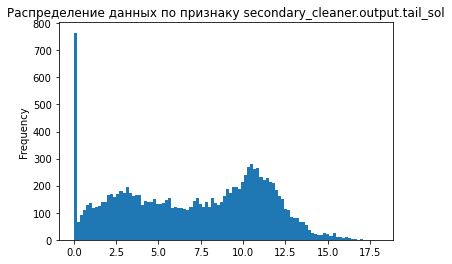

In [8]:
# провереям распределение данных по признаку с максимальным количеством пропущенных значений (11%)
data_full['secondary_cleaner.output.tail_sol']\
.plot(kind = 'hist', \
      bins=100, title='Распределение данных по признаку secondary_cleaner.output.tail_sol');

In [9]:
# выводим стат информацию по параметру
data_full['secondary_cleaner.output.tail_sol'].describe()

count    12544.000000
mean         6.938693
std          4.155487
min          0.000000
25%          3.225486
50%          7.302639
75%         10.547068
max         17.976171
Name: secondary_cleaner.output.tail_sol, dtype: float64

In [10]:
# проверяем пропущенные значения в обучающей выборке
data_train_null = data_train.isna().sum().sort_values(ascending=False).to_frame(name='null_qnt')
data_train_null['null_share'] = data_train_null['null_qnt'] / len(data_train) *100
data_train_null = data_train_null.reset_index().rename(columns={"index":'parameter'})
data_train_null = data_train_null[data_train_null['null_qnt'] != 0]
display(data_train_null.head())

,parameter,null_qnt,null_share
0,secondary_cleaner.output.tail_sol,1748,8.992232
1,rougher.input.floatbank11_xanthate,453,2.330367
2,rougher.state.floatbank10_e_air,436,2.242914
3,primary_cleaner.output.concentrate_sol,370,1.903390
4,secondary_cleaner.state.floatbank2_a_air,220,1.131745


In [11]:
# проверяем пропущенные значения в тестовой выборке
data_test_null = data_test.isna().sum().sort_values(ascending=False).to_frame(name='null_qnt')
data_test_null['null_share'] = data_test_null['null_qnt'] / len(data_test) *100
data_test_null = data_test_null.reset_index().rename(columns={"index":'parameter'})
data_test_null = data_test_null[data_test_null['null_qnt'] != 0]
display(data_test_null.head())

,parameter,null_qnt,null_share
0,rougher.input.floatbank11_xanthate,25,0.472590
1,rougher.input.feed_sol,21,0.396975
2,secondary_cleaner.state.floatbank3_a_air,9,0.170132
3,rougher.input.floatbank11_sulfate,8,0.151229
4,primary_cleaner.input.depressant,5,0.094518


In [12]:
data_full['secondary_cleaner.output.tail_sol'] = data_full['secondary_cleaner.output.tail_sol'].replace(0, np.nan)

data_train['secondary_cleaner.output.tail_sol'] = data_train['secondary_cleaner.output.tail_sol'].replace(0, np.nan)


In [13]:
# производим замену пропущенных значений
data_full = data_full.fillna(method='ffill')
data_train= data_train.fillna(method='ffill') 
data_test = data_test.fillna(method='ffill')

#print('Количество пропущенных значений после замены в исходном файле:', data_full.isna().sum())
#print('Количество пропущенных значений после замены в обучающей выборке:', data_train.isna().sum())
#print('Количество пропущенных значений после замены в тестовой выборке:', data_test.isna().sum())

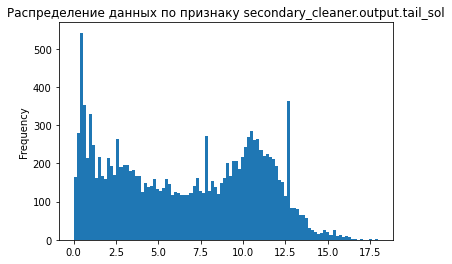

In [14]:
# провереям распределение данных по признаку с максимальным количеством пропущенных значений (11%)
data_full['secondary_cleaner.output.tail_sol']\
.plot(kind = 'hist', \
      bins=100, title='Распределение данных по признаку secondary_cleaner.output.tail_sol');

In [15]:
# выводим стат информацию по параметру
data_full['secondary_cleaner.output.tail_sol'].describe()

count    14149.000000
mean         6.629233
std          4.260775
min          0.014898
25%          2.589614
50%          6.831858
75%         10.460452
max         17.976171
Name: secondary_cleaner.output.tail_sol, dtype: float64

In [16]:
# отфильтровываем объекты с нулевыми значениями переменных из выборок
data_full = data_full[data_full['rougher.output.recovery'] > 0]
data_full = data_full[data_full['final.output.recovery'] > 0]

data_train = data_train[data_train['rougher.output.recovery'] > 0]
data_train = data_train[data_train['final.output.recovery'] > 0]

display(data_full.shape)
display(data_train.shape)

(13795, 86)

(18949, 86)

## Анализ данных

In [17]:
# добавляем проверку расчета эффективности для этапа флотации в обучающую выборку
data_train_copy = data_train.copy()
data_train_copy['rec_check'] = (data_train_copy['rougher.output.concentrate_au']\
                           * (data_train_copy['rougher.input.feed_au'] - data_train_copy['rougher.output.tail_au']))\
                           / (data_train_copy['rougher.input.feed_au']\
                           * (data_train_copy['rougher.output.concentrate_au'] - data_train_copy['rougher.output.tail_au']))\
                           * 100
display(data_train_copy['rec_check'].describe())

count    18949.000000
mean        85.096348
std          7.498769
min          2.520854
25%         81.462383
50%         86.378811
75%         90.105746
max        100.000000
Name: rec_check, dtype: float64

In [18]:
# рассчитываем MAE
MAE = abs(data_train_copy['rec_check'] - data_train_copy['rougher.output.recovery'])\
/ len(data_train_copy['rougher.output.recovery'])
print('MAE обогащения этапа флотации на обучающей выборке (оригинал vs расчет):', MAE.mean())

MAE обогащения этапа флотации на обучающей выборке (оригинал vs расчет): 5.317772136050034e-19


In [19]:
# выводим признаки, исключенные из тестовой выборки
data_train_col = data_train.columns
data_test_col = data_test.columns
excl_param = pd.Series(list(set(data_train_col) - set(data_test_col)))
display(excl_param.sort_values())
excl_param_list = excl_param.to_list

33                          final.output.concentrate_ag
31                          final.output.concentrate_au
24                          final.output.concentrate_pb
28                         final.output.concentrate_sol
9                                 final.output.recovery
2                                  final.output.tail_ag
7                                  final.output.tail_au
15                                 final.output.tail_pb
0                                 final.output.tail_sol
22                primary_cleaner.output.concentrate_ag
3                 primary_cleaner.output.concentrate_au
12                primary_cleaner.output.concentrate_pb
6                primary_cleaner.output.concentrate_sol
8                        primary_cleaner.output.tail_ag
27                       primary_cleaner.output.tail_au
17                       primary_cleaner.output.tail_pb
11                      primary_cleaner.output.tail_sol
5                       rougher.calculation.au_p

In [20]:
# выводим стат данные по золоту
rougher_output_concentrate_au = data_full['rougher.output.concentrate_au'].describe().to_frame()
primary_cleaner_output_concentrate_au = data_full['primary_cleaner.output.concentrate_au'].describe().to_frame()
final_output_concentrate_au = data_full['final.output.concentrate_au'].describe().to_frame()

au = rougher_output_concentrate_au.join(primary_cleaner_output_concentrate_au, how='left')\
.join(final_output_concentrate_au, how='left')
display(au)

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,13795.000000,13795.000000,13795.000000
mean,19.854799,32.367660,44.173624
std,2.482202,5.790100,3.980937
min,0.010000,0.000000,0.010000
25%,18.562590,30.824710,43.282622
50%,20.003264,33.191382,44.868073
75%,21.425916,35.316125,46.149205
max,28.146838,45.933934,52.756638


In [21]:
# выводим стат данные по серебру
rougher_output_concentrate_ag = data_full['rougher.output.concentrate_ag'].describe().to_frame()
primary_cleaner_output_concentrate_ag = data_full['primary_cleaner.output.concentrate_ag'].describe().to_frame()
final_output_concentrate_ag = data_full['final.output.concentrate_ag'].describe().to_frame()

ag = rougher_output_concentrate_ag.join(primary_cleaner_output_concentrate_ag, how='left')\
.join(final_output_concentrate_ag, how='left')
display(ag)

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,13795.000000,13795.000000,13795.000000
mean,12.029788,8.205179,5.165178
std,2.135440,2.005823,1.333289
min,0.010000,0.000000,0.010000
25%,10.567271,7.109181,4.222427
50%,11.810049,8.228354,5.005550
75%,13.465338,9.513531,5.862109
max,24.480271,16.081632,16.001945


In [22]:
# выводим стат данные по свинцу
rougher_output_concentrate_pb = data_full['rougher.output.concentrate_pb'].describe().to_frame()
primary_cleaner_output_concentrate_pb = data_full['primary_cleaner.output.concentrate_pb'].describe().to_frame()
final_output_concentrate_pb = data_full['final.output.concentrate_pb'].describe().to_frame()

pb = rougher_output_concentrate_pb.join(primary_cleaner_output_concentrate_pb, how='left')\
.join(final_output_concentrate_pb, how='left')
display(pb)

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,13795.000000,13795.000000,13795.000000
mean,7.829981,9.552910,10.175150
std,1.493055,2.711295,1.527923
min,0.010000,0.000000,0.010000
25%,6.923615,8.296753,9.301671
50%,7.793305,9.896059,10.306808
75%,8.625369,11.277732,11.183322
max,13.617072,17.081278,17.031899


<div style="border:solid green 4px; padding: 20px">

концентрация свинца в процессе обработки растет:

среднее значение возрастает с 7.82 до 10.17

максимальное значение возрастает с 13.61 до 17.03

основные изменения также происходят после первого этапа очистки

In [23]:
# создаем копию датасета для изучения суммарных значений концентраций веществ
data_full_copy = data_full.copy() 

In [24]:
# суммируем концентрацию всех веществ в сырье
data_full_copy['sum_concetrate_base']\
= data_full_copy['rougher.input.feed_ag']\
+ data_full_copy['rougher.input.feed_pb']\
+ data_full_copy['rougher.input.feed_sol']\
+ data_full_copy['rougher.input.feed_au']
display(data_full_copy['sum_concetrate_base'].describe())

count    13795.000000
mean        56.219933
std          6.989913
min          0.040000
25%         52.538724
50%         56.619236
75%         60.760588
max         74.458253
Name: sum_concetrate_base, dtype: float64

In [25]:
# суммируем концентрацию всех веществ в черновом концентрате
data_full_copy['sum_concetrate_rougher']\
= data_full_copy['rougher.output.concentrate_ag']\
+ data_full_copy['rougher.output.concentrate_pb']\
+ data_full_copy['rougher.output.concentrate_sol']\
+ data_full_copy['rougher.output.concentrate_au']
display(data_full_copy['sum_concetrate_rougher'].describe())

count    13795.000000
mean        68.610459
std          8.113216
min          0.040000
25%         65.248019
50%         69.310903
75%         73.508255
max         88.140119
Name: sum_concetrate_rougher, dtype: float64

In [26]:
# суммируем концентрацию всех веществ после первичной очистки
data_full_copy['sum_concetrate_primary']\
= data_full_copy['primary_cleaner.output.concentrate_ag']\
+ data_full_copy['primary_cleaner.output.concentrate_pb']\
+ data_full_copy['primary_cleaner.output.concentrate_sol']\
+ data_full_copy['primary_cleaner.output.concentrate_au']
display(data_full_copy['sum_concetrate_primary'].describe())

count    13795.000000
mean        60.120800
std         10.394960
min          0.000000
25%         58.039345
50%         61.730843
75%         65.305376
max         76.918076
Name: sum_concetrate_primary, dtype: float64

In [27]:
# суммируем концентрацию всех веществ в финальном концентрате
data_full_copy['sum_concetrate_final']\
= data_full_copy['final.output.concentrate_ag']\
+ data_full_copy['final.output.concentrate_pb']\
+ data_full_copy['final.output.concentrate_sol']\
+ data_full_copy['final.output.concentrate_au']
display(data_full_copy['sum_concetrate_final'].describe())

count    13795.000000
mean        68.664585
std          5.432306
min          0.040000
25%         67.559772
50%         69.136193
75%         70.953745
max         80.210644
Name: sum_concetrate_final, dtype: float64

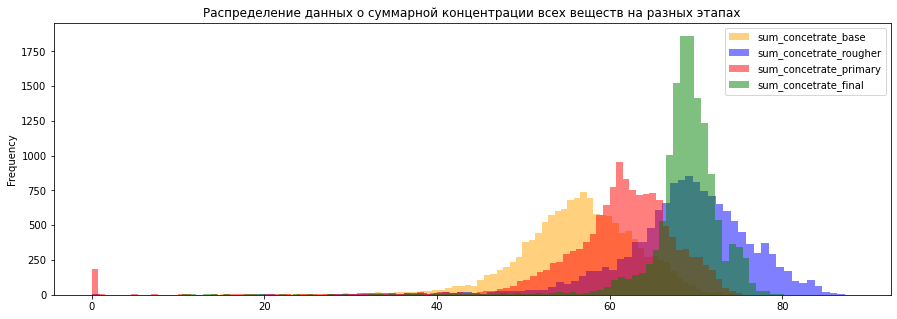

In [28]:
# строим гистограмму распределения данных по всем этапам
plt.figure(figsize=(15, 5))

data_full_copy['sum_concetrate_base'].plot(kind = 'hist', color='orange', alpha = 0.5, label = 'sum_concetrate_base'\
                                         , bins = 100)
data_full_copy['sum_concetrate_rougher'].plot(kind = 'hist', color = 'blue', alpha = 0.5, label = 'sum_concetrate_rougher' \
                                         , bins = 100)
data_full_copy['sum_concetrate_primary'].plot(kind = 'hist', color='red', alpha = 0.5, label = 'sum_concetrate_primary'\
                                         , bins = 100)
data_full_copy['sum_concetrate_final'].plot(kind = 'hist', color='green', alpha = 0.5, label = 'sum_concetrate_final'\
                                         , bins = 100)
plt.title('Распределение данных о суммарной концентрации всех веществ на разных этапах')
plt.legend()
plt.show()

<div style="border:solid green 4px; padding: 20px">

по результату прохождения этапов обработки суммарная концентрация веществ сокращает разброс данных

распределение уплотняется вокруг моды, мода растет

анализ нулевых значений показал очевидное наличие ошибки внесения данных по результатам первичного этапа обработки, влияющей на целевую переменную

In [29]:
# отфильтровываем объекты с нулевыми значениями переменных из выборок
data_full = data_full[data_full['primary_cleaner.output.concentrate_ag'] > 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_ag'] > 0]

display(data_full.shape)
display(data_train.shape)

(13725, 86)

(18848, 86)

In [30]:
# выводим список параметров, определяющих размер гранул на разных этапах очистки в обучающей выборке
data_train_feed_size = data_train.filter(regex = 'feed_size')
data_train_feed_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18848 entries, 0 to 19438
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   primary_cleaner.input.feed_size  18848 non-null  float64
 1   rougher.input.feed_size          18848 non-null  float64
dtypes: float64(2)
memory usage: 441.8 KB


In [31]:
# выводим список параметров, определяющих размер гранул на разных этапах очистки в тестовой выборке
data_test_feed_size = data_test.filter(regex = 'feed_size')
data_test_feed_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   primary_cleaner.input.feed_size  5290 non-null   float64
 1   rougher.input.feed_size          5290 non-null   float64
dtypes: float64(2)
memory usage: 82.8 KB


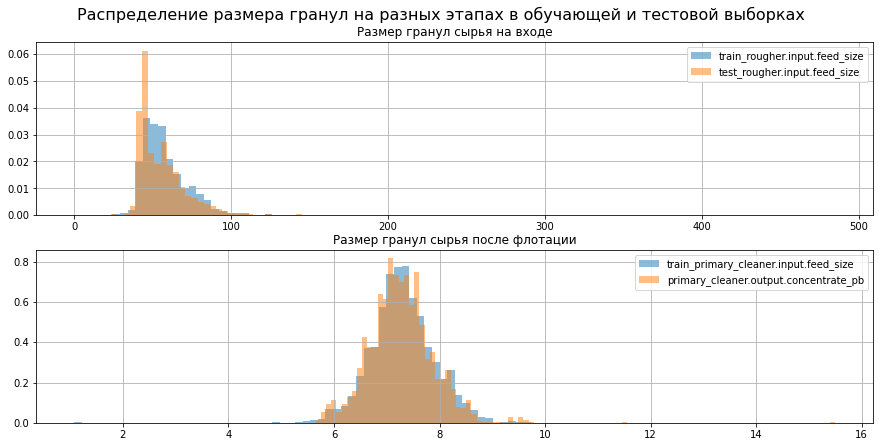

In [32]:
# строим гистограммы распределения данных
fig, ax = plt.subplots(2, 1)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Распределение размера гранул на разных этапах в обучающей и тестовой выборках', y=0.95, size=16)

ax[0].hist(data_train['rougher.input.feed_size']\
, bins=100, alpha = 0.5, label = 'train_rougher.input.feed_size', density=True)
ax[0].hist(data_test['rougher.input.feed_size']\
, bins=100, alpha = 0.5, label = 'test_rougher.input.feed_size', density=True)
ax[0].legend()
ax[0].set_title('Размер гранул сырья на входе')
ax[0].grid()

ax[1].hist(data_train['primary_cleaner.input.feed_size']\
, bins=100, alpha = 0.5, label = 'train_primary_cleaner.input.feed_size', density=True)
ax[1].hist(data_test['primary_cleaner.input.feed_size']\
, bins=100, alpha = 0.5, label = 'primary_cleaner.output.concentrate_pb', density=True)
ax[1].legend()
ax[1].set_title('Размер гранул сырья после флотации')
ax[1].grid()

plt.show()

<div style="border:solid green 4px; padding: 20px">

Сильных отличий не вывлено; ожидается, что оценка модели будет правильной

## Модель

In [33]:
# делим данные на признаки (features) и целевую переменную (target) для обучающей и тестовой выборок
columns = data_test.columns

features_train = data_train[columns] # формируем признаки, выбираем из trian только те параметры, которые есть в test

target_train = data_train[['rougher.output.recovery','final.output.recovery']] # формируем вектор целевых признаков

In [34]:
data_test_target = data_test.join(data_full, how = 'left', rsuffix="_dummy") # создаем полный датасет со всеми признаками для тестовой выборки
data_test_target = data_test_target.dropna() # удаляем пропуски
features_test = data_test_target[columns] # формируем набор признаков тестовой выборки

target_test = data_test_target[['rougher.output.recovery','final.output.recovery']] # формируем вектор целевых признаков

In [35]:
display(features_train.shape)
display(target_train.shape)

(18848, 52)

(18848, 2)

In [36]:
display(features_test.shape)
display(target_test.shape)

(5206, 52)

(5206, 2)

In [37]:
# стандартизируем данные
# обучаем StandartScaler на обучающей выборке

scaler = StandardScaler()
scaler.fit(features_train)

# преобразуем обучающий и валидационные наборы данных

features_train_st = scaler.transform(features_train)
features_test_st = scaler.transform(features_test)

In [38]:
def sMAPE(predict,target):
    
    predict_rougher = predict[:,0]
    target_rougher = target[:,0]
    
    predict_final = predict[:,1]
    target_final = target[:,1]
    
    sMAPE_rougher = np.sum(abs(target_rougher - predict_rougher) / ((abs(target_rougher) + abs(predict_rougher)) / 2))
    
    sMAPE_rougher = sMAPE_rougher / len(target_rougher) * 100
       
    sMAPE_final = np.sum(abs(target_final - predict_final) / ((abs(target_final) + abs(predict_final)) / 2))
    sMAPE_final = sMAPE_final / len(target_final) * 100
    
    sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    
    return sMAPE

In [39]:
smape_scorer = make_scorer(sMAPE, greater_is_better = False)

In [40]:
# кросс-валидация Линейная регрессия
lr = LinearRegression()
score = cross_val_score(lr, features_train_st, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('LinearRegression sMAPE:', abs(score))

LinearRegression sMAPE: 8.557201161494639


In [41]:
# подбираем лучший гиперпараметр  max_depth с RandomizedSearchCV,
# выбираем метрику настройки sMAPE
max_depth = range(1, 30, 3)
hyperparameters = dict(max_depth=max_depth)
dt = DecisionTreeRegressor(random_state = 0)

randomizedsearch = RandomizedSearchCV(dt, hyperparameters, random_state = 0 \
                                      , scoring= smape_scorer)

dt_best_model_random = randomizedsearch.fit(features_train, np.array(target_train))
print(dt_best_model_random.best_estimator_)

DecisionTreeRegressor(max_depth=1, random_state=0)


In [42]:
# кросс-валидация DecisionTreeRegressor
dt_best = DecisionTreeRegressor(random_state = 0, max_depth=1)

score = cross_val_score(dt_best, features_train_st, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('DecisionTreeRegressor sMAPE:', abs(score))

DecisionTreeRegressor sMAPE: 8.822260086335364


In [43]:
#%%time

# подбираем лучшие гиперпараметры  n_estimators, max_depth, min_samples_leaf с RandomizedSearchCV,
# выбираем метрику настройки sMAPE
#n_estimators = range(1, 100, 10)
#max_depth = range(15,17)
#min_samples_leaf = range(10,12)

#hyperparameters = dict( max_depth=max_depth, min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)
#rf = RandomForestRegressor(random_state = 0)

#randomizedsearch = RandomizedSearchCV(rf, hyperparameters, random_state = 0, scoring = smape_scorer)

#rf_best_model_random = randomizedsearch.fit(features_train, np.array(target_train))
#print(rf_best_model_random.best_estimator_)
#Cам вписал значения гиперпараметров, потому что ждать приходится 30 минут

RandomForestRegressor(max_depth=16, min_samples_leaf=10, n_estimators=91,
                      random_state=0)
CPU times: user 20min 30s, sys: 4.49 s, total: 20min 35s
Wall time: 20min 35s
    

In [44]:
%%time
# кросс-валидация RandomForestRegressor
rf_best = RandomForestRegressor(random_state = 0, max_depth = 16, min_samples_leaf = 10, n_estimators = 91)

score = cross_val_score(rf_best, features_train, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('DecisionTreeRegressor sMAPE:', abs(score))

DecisionTreeRegressor sMAPE: 8.147974299723366
CPU times: user 5min 28s, sys: 954 ms, total: 5min 29s
Wall time: 5min 31s


DecisionTreeRegressor sMAPE: 8.1767069716392
CPU times: user 5min 44s, sys: 797 ms, total: 5min 45s
Wall time: 5min 46s

Проверяем лучшую модель не тестовой выборке

In [45]:
%%time
rf_best = RandomForestRegressor(random_state = 0, max_depth = 16, min_samples_leaf = 10, n_estimators = 91)
rf_best.fit(features_train_st, target_train)

CPU times: user 1min 8s, sys: 148 ms, total: 1min 9s
Wall time: 1min 9s


RandomForestRegressor(max_depth=16, min_samples_leaf=10, n_estimators=91,
                      random_state=0)

In [46]:
predict = rf_best.predict(features_test_st)

smape = sMAPE(predict, np.array(target_test))
print('Симметричная средняя абсолютная ошибка лучшей модели :', smape)

Симметричная средняя абсолютная ошибка лучшей модели : 11.281358554045372


Симметричная средняя абсолютная ошибка лучшей модели : 11.3270560498813

In [47]:
dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(features_train_st, target_train)
predict = dummy_regr.predict(features_test_st)

smape = sMAPE(predict, np.array(target_test))
print('Симметричная средняя абсолютная ошибка модели:', smape)

Симметричная средняя абсолютная ошибка модели: 9.964157599681776


<div style="border:solid green 4px; padding: 20px">
    
# Вывод: 
    Выбранная методом кросс-валидации лучшая модель RandomForestRegressor показала на тестовой выборке результаты метрики SMAPE = 11.32 проверка константной моделью DummyRegressor со страдегией медианы показала на тестовой выборке результаты метрики SMAPE = 9.99 модель рекомендуется в качестве прототипа модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий по восстановлению золота из золотоносной руды